In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


df=pd.read_csv("DSBDALExam DataSets/DSBDALExam DataSets/DSBDALExam DataSets/Iris/iris.csv",sep=',');

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# Check data before cleaning
# -----------------------------
print("\n First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\n Check for '?' values in dataset:")
print((df == '?').sum())

print("\n Missing Values in Each Column:")
print(df.isnull().sum())

print("\n Describe (Check for Negatives or Strange Values):")
print(df.describe())



 First 5 rows of the dataset:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

 Check for '?' values in dataset:
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
v

In [16]:
# e. Data Cleaning
# -----------------------------
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to correct type if needed (float for features)
df[df.columns[:-1]] = df[df.columns[:-1]].astype(float)

# Drop rows with any NA values
df.dropna(inplace=True)

# Remove negative values (if any)
for col in df.columns[:-1]:
    df = df[df[col] >= 0]


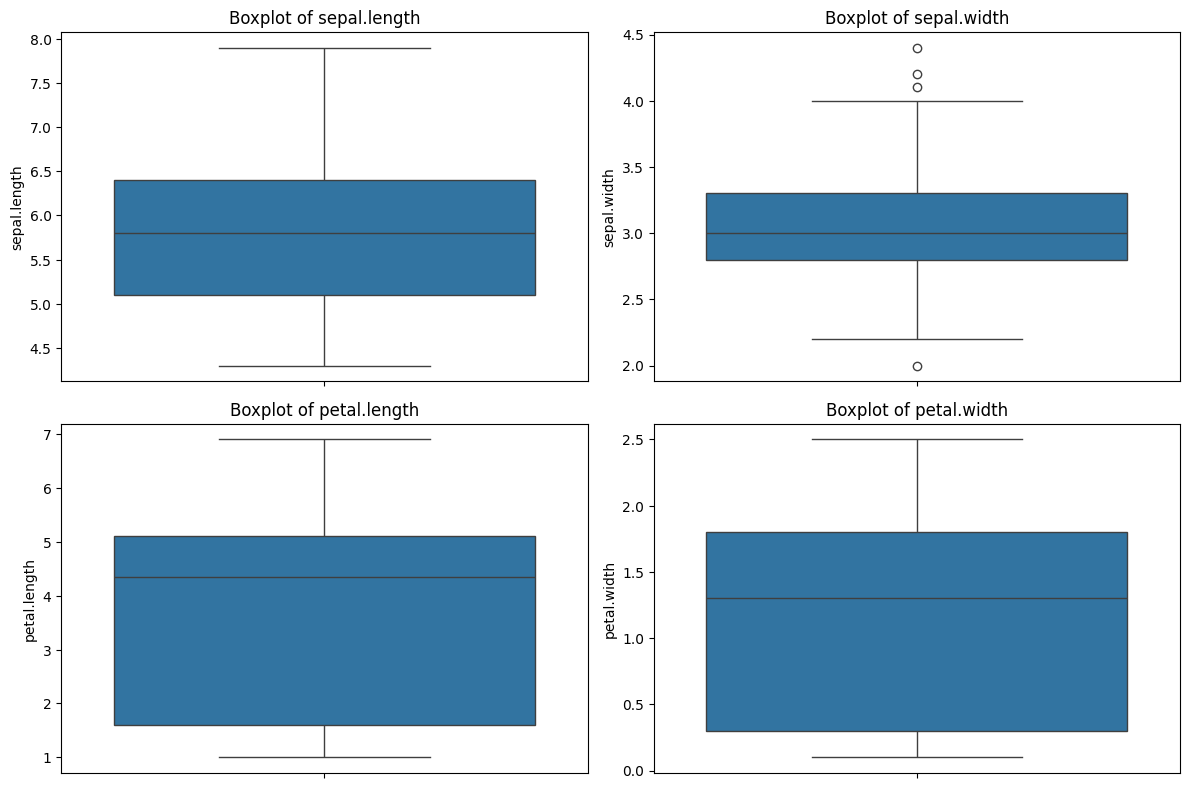

In [17]:
# Visualize outliers before cleaning
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



In [18]:
# f. Outlier Detection and Removal
# -----------------------------
# Using Z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Keep rows with all z-scores < 3


In [29]:
# g. Data Transformation
# -----------------------------
# Normalize/Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the species labels
le = LabelEncoder()
df['variety'] = le.fit_transform(df['variety'])


X = df.drop('variety', axis=1)
y = df['variety']

In [32]:
# h. Build Models and Compare
# -----------------------------

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)

# 2. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)



In [33]:
# Results
print("Logistic Regression Accuracy:", lr_acc)
print("Naive Bayes Accuracy:", nb_acc)
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, lr_preds))
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, nb_preds))


Logistic Regression Accuracy: 0.9
Naive Bayes Accuracy: 0.8666666666666667

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30


Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



In [34]:
numeric_cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
df = df[(df[numeric_cols] >= 0).all(axis=1)]

# f. Error correcting: Outlier detection and removal using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
